In [ ]:

import math
import pandas as pd
import numpy as np
import numpy.random as random 
import matplotlib.pyplot as plt

In [ ]:
#%%
#輸入資料之函數
def x1(a1,b1):
    x1=math.sin(a1)*math.cos(b1)
    return x1

def y1(a1,b1):
    y1=math.sin(a1)*math.sin(b1)
    return y1

def x2(a2,b2):
    x2=math.sin(a2)*math.cos(b2)
    return x2

def y2(a2,b2):
    y2=math.sin(a2)*math.sin(b2)
    return y2

def x3(a3,b3):
    x3=math.sin(a3)*math.cos(b3)
    return x3

def y3(a3,b3):
    y3=math.sin(a3)*math.sin(b3)
    return y3

In [ ]:
#原本上面定義的函數不接受array,通過vectorize便能夠輸入矩陣進入變數裏面
x1=np.vectorize(x1)
y1=np.vectorize(y1)
x2=np.vectorize(x2)
y2=np.vectorize(y2)
x3=np.vectorize(x3)
y3=np.vectorize(y3)

a1=-math.pi/4+(math.pi/2)*random.uniform(0,1,20)
b1=2*math.pi*random.uniform(0,1,20)
sdev1=0.6*random.uniform(0,1,20)
sdev2=0.6*random.uniform(0,1,20)
output1=x1(a1,b1)+sdev1
output2=y1(a1,b1)+sdev2

a2=(math.pi/4)+((2*math.pi)/4)*random.uniform(0,1,20)
b2=(-math.pi/2)+(math.pi)*random.uniform(1,20)
sdev3=0.6*random.uniform(0,1,20)
sdev4=0.6*random.uniform(0,1,20)
output3=x2(a2,b2)+sdev3
output4=y2(a2,b2)+sdev4

a3=(-math.pi/2)+((4*math.pi)/2)*random.uniform(0,1,20)
b3=(-math.pi/2)+(4*math.pi/4)*random.uniform(0,1,20)
sdev5=0.6*random.uniform(0,1,20)
sdev6=0.6*random.uniform(0,1,20)
output5=x3(a3,b3)+sdev5
output6=y3(a3,b3)+sdev6

X_1=np.hstack((output1,output3,output5))
X_2=np.hstack((output2,output4,output6))
x=np.vstack((X_1,X_2))
x=np.transpose(x)

#K-means classification

Text(0.5, 1.0, 'K-means')

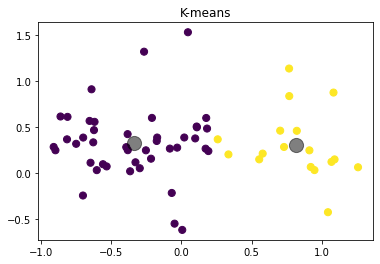

In [ ]:
#%%
#K-means classification

#接下來匯入KMeans函式庫
from sklearn.cluster import KMeans #安裝 k-means 套件方式: pip install sklearn
#請KMeans分成四類
clf = KMeans(n_clusters=2)
#開始訓練
clf.fit(x)
#分類結果
km_labels = clf.labels_ #分成哪一類
km_centers = clf.cluster_centers_ #四組分類的中心點

plt.scatter(x[:,0],x[:,1], c=km_labels,s=50,cmap='viridis')
plt.scatter(km_centers[:, 0], km_centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('K-means')

In [ ]:
clf.cluster_centers_

array([[-0.33741832,  0.32733288],
       [ 0.81366574,  0.31038594]])

#Fuzzy-C means classification

In [ ]:
pip install fuzzy-c-means

     |████████████████████████████████| 15.7 MB 7.0 MB/s 
     |████████████████████████████████| 10.1 MB 53.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Text(0.5, 1.0, 'Fuzzy-c-means')

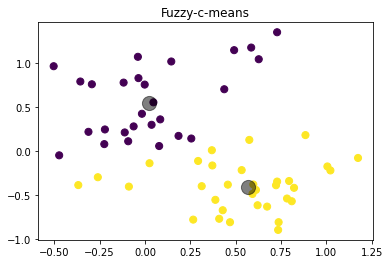

In [ ]:
#Fuzzy-C means classification
#接下來匯入Fuzzy C-Means函式庫
from fcmeans import FCM #安裝 fuzzy-c-means 套件方式: pip install fuzzy-c-means
#請KMeans分成四類
fcm = FCM(n_clusters=2)
#開始訓練
fcm.fit(x)
#分類結果
fcm_centers = fcm.centers #分成哪一類
fcm_labels  = fcm.u.argmax(axis=1) #四組分類的中心點
plt.scatter(x[:,0],x[:,1], c=fcm_labels,s=50,cmap='viridis')
plt.scatter(fcm_centers[:, 0], fcm_centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('Fuzzy-c-means')

In [ ]:
fcm_centers

array([[ 0.51378198,  0.3819915 ],
       [-0.44511892,  0.03765958]])

In [ ]:
from numpy import linalg as LA
d1=[]
d2=[]
#d3=[]
# d4=[]

for i in range(1):
        
    fcm = FCM(n_clusters=2)   
    fcm.fit(x)
    fcm_centers = fcm.centers 
    fcm_labels  = fcm.u.argmax(axis=1) 
    di1=LA.norm((x[np.where(fcm_labels==0)]-fcm_centers[0]),2)
    di2=LA.norm((x[np.where(fcm_labels==1)]-fcm_centers[1]),2)
    #di3=LA.norm((x[np.where(fcm_labels==2)]-fcm_centers[2]),2)
    # di4=LA.norm((x[np.where(fcm_labels==3)]-fcm_centers[3]),2)
    
    
    d1.append(di1)
    d2.append(di2)
    #d3.append(di3)
    # d4.append(di4)

In [ ]:
print(np.mean(d1),np.var(d1))
print(np.mean(d2),np.var(d2))
#print(np.mean(d3),np.var(d3))
# print(np.mean(d4),np.var(d4))

2.3371007143117226 0.0
1.9793789930474273 0.0


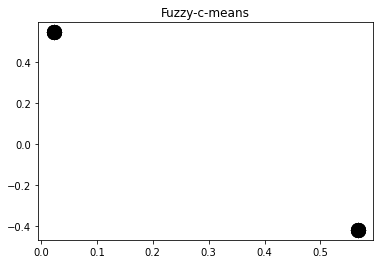

In [ ]:
for i in range(50):

  fcm = FCM(n_clusters=2)
  
  fcm.fit(x)
  
  fcm_centers = fcm.centers #分成哪一類
  fcm_labels  = fcm.u.argmax(axis=1) #四組分類的中心點
  #plt.scatter(x[:,0],x[:,1], c=fcm_labels,s=50,cmap='viridis')
  plt.scatter(fcm_centers[:, 0], fcm_centers[:, 1], c='black', s=200, alpha=0.1);
  plt.title('Fuzzy-c-means')





#Substractive clustering

In [ ]:
#建立substractive clustering algorithm
#以下的code是根據 https://github.com/bhaveshkumarraj/Subtractive-Clustering-Algorithm/blob/master/code.py 去改寫
def substractive_clustering_algorithm(input_data,ra,rb,Eup,Edown):
    cluster_center = []
    size = len(input_data)
    potential = [0.0] * size
    for i in range(size):
        Xi = input_data[i]
        for j in range(i + 1, size):
            Xj = input_data[j]
            value = np.exp(-4* ((Xi[0] - Xj[0]) ** 2 + (Xi[1] - Xj[1]) ** 2 ) / (ra / 2) ** 2)
            potential[i] += value
            potential[j] += value
    max_potential_value = max(potential)  # p1
    max_potential_index = potential.index(max_potential_value)
    
    # filter through accept and reject criteria
    current_max_value = max_potential_value
    criteria = 1
    while criteria and current_max_value:
        criteria = 0
        max_potential_vector = input_data[max_potential_index]  # x1
        potential_ratio = current_max_value / max_potential_value  # Pk and MaxPValue
    
        if potential_ratio > Eup:
            criteria = 1
        elif potential_ratio > Edown:
            dmin = np.min([(max_potential_vector[0] - cc[0]) ** 2 + (max_potential_vector[1] - cc[1]) ** 2 for cc in cluster_center])
            if ((dmin / ra) + potential_ratio) >= 1:
                criteria = 1
            else:
                criteria = 2
        elif potential_ratio < Edown:
            break
    
        if criteria is 1:
            cluster_center.append(max_potential_vector)
            for i in range(size):
                Xj = input_data[i]
                potential_value = potential[i]
                potential_value = potential_value - (current_max_value * np.exp(-4*
                                                    ((max_potential_vector[0] - Xj[0]) ** 2 +
                                                    (max_potential_vector[1] - Xj[1]) ** 2 )) / (rb / 2) ** 2)
                if potential_value < 0:
                    potential_value = 0
                potential[i] = potential_value
            current_max_value = max(potential)  # p1
            max_potential_index = potential.index(current_max_value)
        elif criteria is 2:
            potential[max_potential_index] = 0
            current_max_value = max(potential)  # p1
            max_potential_index = potential.index(current_max_value)
            
    return cluster_center

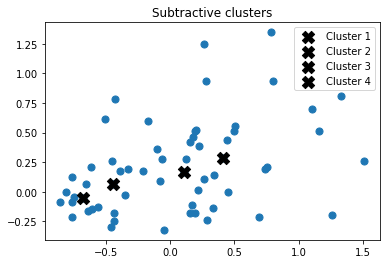

In [ ]:
#%%
#Substractive clustering
ra = 2
rb = ra * 1.5
Eup = 0.5
Edown = 0.15
#套用在上方呼叫好的減法聚類函數
sub_center=substractive_clustering_algorithm(x,ra,rb,Eup,Edown)

plt.scatter(x[:,0],x[:,1],s=50,cmap='viridis')
plt.Circle((0.10881512,0.16586434), 1.9, color='r')

for idx, centroid in enumerate(sub_center):
    plt.scatter(*centroid, c='k', s=150, marker='X',label='Cluster '+str(idx+1))
plt.title('Subtractive clusters')

plt.legend()
plt.show()

In [ ]:
for i in range(50):

  #Substractive clustering
  ra = 2
  rb = ra * 1.5
  Eup = 0.5
  Edown = 0.15
  #套用在上方呼叫好的減法聚類函數
  sub_center=substractive_clustering_algorithm(x,ra,rb,Eup,Edown)

  #plt.scatter(x[:,0],x[:,1],s=50,cmap='viridis')
  #plt.Circle((0.10881512,0.16586434), 1.9, color='r')

  for idx, centroid in enumerate(sub_center):
      plt.scatter(*centroid, c='k', s=150, marker='X',label='Cluster '+str(idx+1))
  plt.title('Subtractive clusters')

  plt.legend()
  plt.show()
